# Tree-based Models

For this Notebook we'll use the adults dataset

Importing Librairies

In [1]:
import pandas as pd
import numpy as np

Load the dataset

In [2]:
adult_df = pd.read_csv("Adult.csv")


In [3]:
adult_df.head

<bound method NDFrame.head of        income                race   sex workclass marital-status  age  \
0      <=50K.               White  Male       Gov  Never-married   39   
1       >50K.  Asian-Pac-Islander  Male       Gov        Married   30   
2      <=50K.               Black  Male       Gov        Married   35   
3       >50K.               White  Male       Gov        Married   56   
4      <=50K.               White  Male       Gov  Never-married   23   
...       ...                 ...   ...       ...            ...  ...   
23587   >50K.               White  Male      Self        Married   65   
23588   >50K.  Asian-Pac-Islander  Male      Self        Married   53   
23589  <=50K.               White  Male      Self  Never-married   30   
23590  <=50K.               White  Male      Self        Married   41   
23591  <=50K.  Asian-Pac-Islander  Male      Self        Married   43   

       education-num  capital-gain  capital-loss  hours-per-week  
0                 13      

Dummifying the columns 

In [4]:
adult_df = pd.get_dummies(adult_df, columns = ['race','sex','workclass','marital-status'])

Setting up the variables

In [5]:
X = adult_df.iloc[:,1:]
y = adult_df.iloc[:,0]

Splitting the data into train & testing set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=5)

## Using Classification Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(max_depth=3) # 3 is the number of layers
model = decisiontree.fit(X_train, y_train)

Make prediction

In [8]:
y_test_pred = model.predict(X_test)      

CHecking the accuracuy

In [9]:
from sklearn.metrics import accuracy_score
accuracy_cart = accuracy_score(y_test, y_test_pred)      
accuracy_cart

0.8413819676342152

Printing the tree

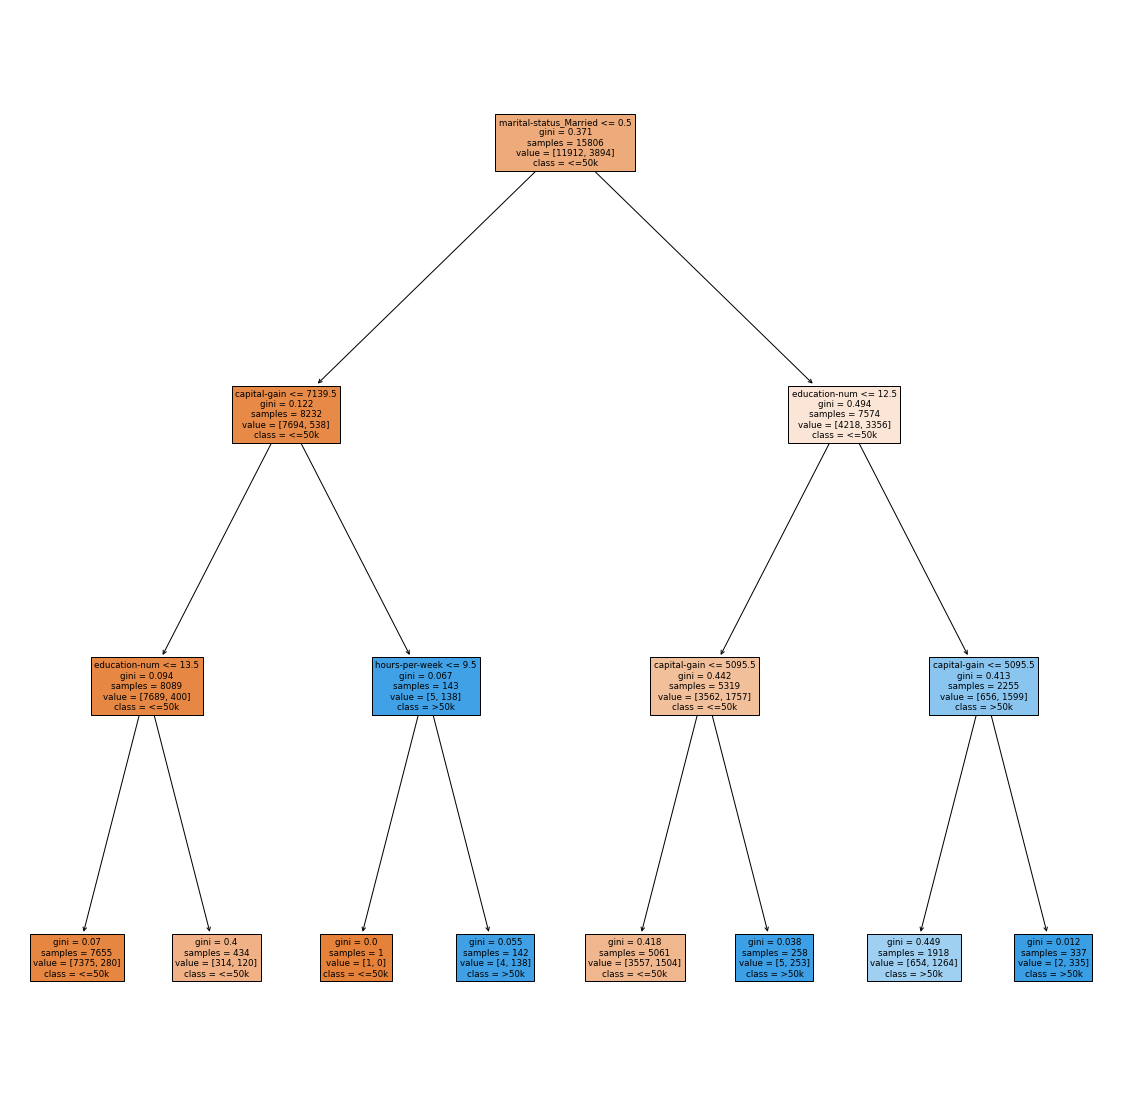

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
features = X.columns
classes = ['<=50k','>50k']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

Cross Validation with K-Fold

In [11]:
from sklearn.model_selection import cross_val_score
for i in range (2,21):                                                 
    model2 = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))

2 : 0.823202802053625
3 : 0.8387590828378528
4 : 0.8424468167386971
5 : 0.8431673083682796
6 : 0.8468550782011801
7 : 0.8474061681507055
8 : 0.8490169303765203
9 : 0.8457530330473411
10 : 0.8439303615187079
11 : 0.8401156976285111
12 : 0.8404123886184852
13 : 0.83782669987148
14 : 0.8365550913433297
15 : 0.8333763170558424
16 : 0.8309602994793176
17 : 0.8259582518012515
18 : 0.8241354724764491
19 : 0.8249407907082575
20 : 0.8234149988128946


## Random Forest

Building the model

In [12]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)
model_rf = randomforest.fit(X_train, y_train)

Feature Importance

<AxesSubplot:>

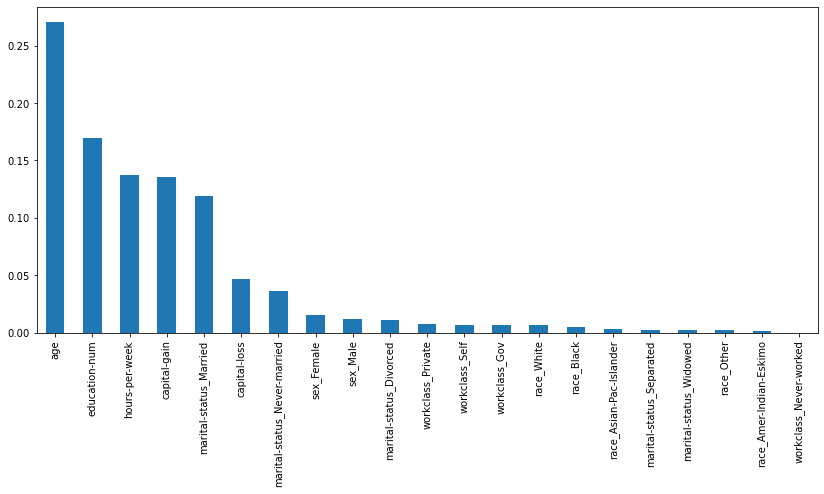

In [13]:
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))


Prediction & accuracy evaluation

In [15]:
y_test_pred = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_test_pred)
accuracy_rf

0.8371435910608785

K-fold cross validation

In [16]:
for i in range (2,7):                                                                   
    model2 = RandomForestClassifier(random_state=0,max_features=i,n_estimators=100)
    scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))

2 : 0.8343503452756217
3 : 0.8352404811266425
4 : 0.8353252897628403
5 : 0.8349862528443591
6 : 0.8346048699973707


Cross Validation using OOB

In [17]:
randomforest2 = RandomForestClassifier(random_state=0,oob_score=True)   
model3 = randomforest2.fit(X, y)
model3.oob_score_

0.832909460834181

## Gradient Boosting 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()                           
model_gbt = gbt.fit(X_train, y_train)

Prediction and accuracy

In [20]:
y_test_pred = model_gbt.predict(X_test)
accuracy_gbt = accuracy_score(y_test, y_test_pred)
accuracy_gbt

0.8593629591574621

K-fold cross validation

In [21]:
for i in range (2,10):                                                                        
    model2 = GradientBoostingClassifier(random_state=0,min_samples_split=i,n_estimators=100)
    scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))

2 : 0.8537217750328082
3 : 0.8538065567199637
4 : 0.8532978665970303
5 : 0.8532978665970303
6 : 0.8531283032227192
7 : 0.8530859123791414
8 : 0.8532130669438465
9 : 0.8531283211887473
